##### Importando Libs

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
lm = linear_model

##### Lendo o arquivos CSV 'calendar' pra encontrar o preço

In [2]:
df_preço = pd.read_csv(r"C:\Users\Renan\Downloads\calendar.csv")
df_preço

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,487677,2021-10-27,t,"$1,113.00","$1,113.00",5.0,1125.0
1,487461,2021-10-27,t,$556.00,$556.00,5.0,1125.0
2,487461,2021-10-28,t,$556.00,$556.00,5.0,1125.0
3,487461,2021-10-29,t,$556.00,$556.00,5.0,1125.0
4,487461,2021-10-30,t,$556.00,$556.00,5.0,1125.0
...,...,...,...,...,...,...,...
8526082,52920584,2022-10-21,f,"$2,500.00","$2,250.00",5.0,1125.0
8526083,52920584,2022-10-22,f,"$2,500.00","$2,250.00",5.0,1125.0
8526084,52920584,2022-10-23,f,"$2,500.00","$2,250.00",5.0,1125.0
8526085,52920584,2022-10-24,f,"$2,500.00","$2,250.00",5.0,1125.0


#### Adicionando o arquivo 'listings' ao dataframe porque ele contém as reviews(variáveis explicativas)

In [3]:
df_reviews =  pd.read_csv(r'C:\Users\Renan\Downloads\listings.csv')

In [4]:

df_reviews

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211026045247,2021-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.65,NaN,f,1,1,0,0,2.07
1,24480,https://www.airbnb.com/rooms/24480,20211026045247,2021-10-26,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.85
2,25026,https://www.airbnb.com/rooms/25026,20211026045247,2021-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.84
3,35636,https://www.airbnb.com/rooms/35636,20211026045247,2021-10-27,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.90
4,35764,https://www.airbnb.com/rooms/35764,20211026045247,2021-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,52987571,https://www.airbnb.com/rooms/52987571,20211026045247,2021-10-26,Tabas | PACOTE REVEILLON/CARNAVAL Ipanema | IP005,"Apartamento Tabas localizado em Ipanema RJ, pr...",NaN,https://a0.muscache.com/pictures/c7b812f4-a141...,104933317,https://www.airbnb.com/users/show/104933317,...,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN
23355,52987764,https://www.airbnb.com/rooms/52987764,20211026045247,2021-10-27,Tabas | PACOTE REVEILLON/CARNAVAL Leblon | LB007,Este apartamento Tabas localizado no Leblon - ...,NaN,https://a0.muscache.com/pictures/17959875-2dbe...,104933317,https://www.airbnb.com/users/show/104933317,...,NaN,NaN,NaN,NaN,f,10,10,0,0,NaN
23356,52990095,https://www.airbnb.com/rooms/52990095,20211026045247,2021-10-26,Apartamento reformado - Posto 5 - Copacabana,"Excelente apartamento, composto de sala, duas ...",NaN,https://a0.muscache.com/pictures/3fa56adc-42bd...,64920145,https://www.airbnb.com/users/show/64920145,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
23357,52991032,https://www.airbnb.com/rooms/52991032,20211026045247,2021-10-27,"Omar do Rio - BR 194/1104: Studio Copacabana, ...","Excellent Studio located in Copacabana, just 8...",Copacabana is located in the South Zone of Rio...,https://a0.muscache.com/pictures/prohost-api/H...,6000862,https://www.airbnb.com/users/show/6000862,...,NaN,NaN,NaN,NaN,t,79,79,0,0,NaN


#### Limpando dados de preço

In [5]:

df_preço_e_id = df_preço[['price','listing_id']]
df_preço_e_id = df_preço_e_id.rename(columns={'listing_id':'id'})
df_preço_e_id['price'] = df_preço_e_id['price'].astype('string')
df_preço_e_id['price'] = df_preço_e_id['price'].str.replace(r'$', '', regex=True)
df_preço_e_id['price'] = df_preço_e_id['price'].str.replace(r',', '', regex=True)
df_preço_e_id


,price,id
0,1113.00,487677
1,556.00,487461
2,556.00,487461
3,556.00,487461
4,556.00,487461
...,...,...
8526082,2500.00,52920584
8526083,2500.00,52920584
8526084,2500.00,52920584
8526085,2500.00,52920584


#### Agrupando "id's" a um preço

In [6]:
df_preço_e_id['price'] = df_preço_e_id['price'].astype(float)
df_preço_e_id = df_preço_e_id[['id','price']].groupby('id').mean()
df_preço_e_id['id'] = df_preço_e_id.index
df_preço_e_id.reset_index(drop=True, inplace=True)
df_preço_e_id

,price,id
0,350.000000,17878
1,296.021918,24480
2,194.126027,25026
3,361.709589,35636
4,154.356164,35764
...,...,...
23354,5700.000000,52987571
23355,2000.000000,52987764
23356,1100.000000,52990095
23357,370.630137,52991032


In [7]:
df_reviews_e_id = df_reviews[['review_scores_location', 'id','review_scores_value','review_scores_communication']]
df_reviews_e_id =df_reviews_e_id[['review_scores_location', 'id','review_scores_value','review_scores_communication']].groupby('id').mean()
df_reviews_e_id['id'] = df_reviews_e_id.index
df_reviews_e_id.reset_index(drop=True, inplace=True)
df_reviews_e_id

,review_scores_location,review_scores_value,review_scores_communication,id
0,4.76,4.65,4.90,17878
1,4.97,4.58,4.90,24480
2,4.81,4.56,4.90,25026
3,4.90,4.65,4.88,35636
4,4.94,4.87,4.94,35764
...,...,...,...,...
23354,NaN,NaN,NaN,52987571
23355,NaN,NaN,NaN,52987764
23356,NaN,NaN,NaN,52990095
23357,NaN,NaN,NaN,52991032


In [9]:
df_final = df_preço_e_id.merge(df_reviews_e_id, on='id',how='left')
df_final = df_final.dropna()
df_final

,price,id,review_scores_location,review_scores_value,review_scores_communication
0,350.000000,17878,4.76,4.65,4.90
1,296.021918,24480,4.97,4.58,4.90
2,194.126027,25026,4.81,4.56,4.90
3,361.709589,35636,4.90,4.65,4.88
4,154.356164,35764,4.94,4.87,4.94
...,...,...,...,...,...
23183,122.123288,52820534,5.00,5.00,5.00
23196,208.082192,52833417,5.00,5.00,5.00
23204,387.561644,52838489,5.00,5.00,5.00
23232,100.383562,52858945,4.00,4.00,4.00


In [10]:
df_final['id']

0           17878
1           24480
2           25026
3           35636
4           35764
           ...   
23183    52820534
23196    52833417
23204    52838489
23232    52858945
23239    52861328
Name: id, Length: 14679, dtype: int64

In [11]:
df_dados_finais = df_final.copy()
df_dados_finais

,price,id,review_scores_location,review_scores_value,review_scores_communication
0,350.000000,17878,4.76,4.65,4.90
1,296.021918,24480,4.97,4.58,4.90
2,194.126027,25026,4.81,4.56,4.90
3,361.709589,35636,4.90,4.65,4.88
4,154.356164,35764,4.94,4.87,4.94
...,...,...,...,...,...
23183,122.123288,52820534,5.00,5.00,5.00
23196,208.082192,52833417,5.00,5.00,5.00
23204,387.561644,52838489,5.00,5.00,5.00
23232,100.383562,52858945,4.00,4.00,4.00


### Descobrindo os Outliers do preço p/ diminuir o Erro

In [12]:
max(df_dados_finais['price'])

75655.59178082192

In [13]:
min(df_dados_finais['price'])


0.0

In [14]:
print(df_dados_finais['price'].isnull().sum())

0


In [15]:
df_dados_finais['price'].describe()

count    14679.000000
mean       478.214390
std       1405.271513
min          0.000000
25%        162.301370
50%        264.246575
75%        454.267123
max      75655.591781
Name: price, dtype: float64

In [16]:
df_dados_finais['price'].median()

264.24657534246575

<AxesSubplot:xlabel='price'>

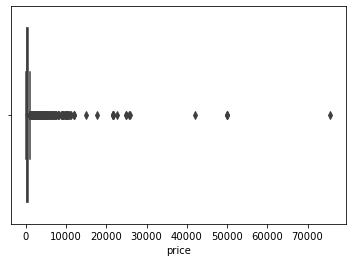

In [17]:
import seaborn as sns
sns.boxplot(x=df_dados_finais['price'])

In [18]:
Q1 = 156.925342
Q3 = 445.173973
mean = 486.372403
    
IQR = Q3-Q1 
sup = mean + 1.5*288.248631
inf = mean - 1.5*288.248631
sup

918.7453495

In [19]:
inf

53.99945650000001

In [24]:
def f(row):
    if df_dados_finais['price'] > 918.7453495 and df_dados_finais['price'] < 53.99945650000001:
        val = 255.349315
        
    return val

median = df_dados_finais['price'].median()

In [27]:
df_dados_finais['preco'] = np.where(df_dados_finais['price'] > 918.7453495, median, df_dados_finais['price'])

In [28]:
df_dados_finais['preco'].max()

918.4109589041096

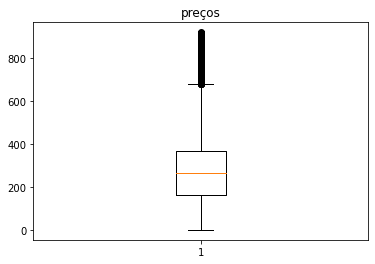

In [29]:
import matplotlib.pyplot as plt 

plt.boxplot(df_dados_finais['preco'])

plt.title("preços")

plt.show()

In [123]:
X = df_dados_finais[['review_scores_location','review_scores_value','review_scores_communication']]

y = df_dados_finais['preco']

x_train = df_dados_finais.iloc[:, 2].values

y_train = df_dados_finais.iloc[:, 0].values

model_lr = lm.LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
len(y_test)

2936

In [125]:
X_test = df_dados_finais[['review_scores_location','review_scores_value','review_scores_communication']]

y_test = df_dados_finais['preco']

from sklearn.linear_model import LinearRegression  

regressor = LinearRegression() 

regressor.fit(X_train,y_train)  

y_pred = regressor.predict(X_test)

df_pronto = pd.DataFrame({'Teste': y_test, 'Previsão': y_pred})

df_pronto


,Teste,Previsão
0,350.000000,289.604206
1,296.021918,303.508708
2,194.126027,296.596337
3,361.709589,296.227465
4,154.356164,288.072805
...,...,...
23183,122.123288,285.425948
23196,208.082192,285.425948
23204,387.561644,285.425948
23232,100.383562,270.970362


In [126]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136.1696122816512
Mean Squared Error: 32017.638234528047
Root Mean Squared Error: 178.9347317725881
